Importing Libraries


In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import string 
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from nltk.stem import PorterStemmer, WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout , Bidirectional
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from functools import reduce

1- Load the dataset

We have 2 datasets
* train
* test

we will load the train dataset

# Train Data

In [2]:
df_train = pd.read_csv("train.csv")

In [3]:
df_train.head()  

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


* id - a unique identifier for each tweet
* text - the text of the tweet
* location - the location the tweet was sent from (may be blank)
* keyword - a particular keyword from the tweet (may be blank)
* target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)

2- Check head and info of the data

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
df_train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


3- Is there a missing data (how many and the percentage if there)? 

In [6]:
missing_data =df_train.isnull().sum()
shape = df_train.shape
shape

(7613, 5)

In [7]:
missing_data

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [8]:
percentage_location_missing= (missing_data.location * 100)/shape[0]
percentage_location_missing

33.27203467752528

In [9]:
percentage_keyword_missing= (missing_data.keyword * 100)/shape[0]
percentage_keyword_missing

0.8012610009194798

As we can see from the previous cells, we have some missing data in 2 columns (location and keyword).
* Almost 33% of the location data is missing and only 0.81% of the keyword data is missing

4- How many data in each class?

In [10]:
df_train.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

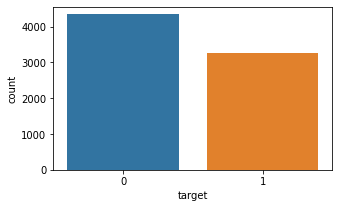

In [11]:
plt.figure(figsize=(5,3))
sns.countplot(x = 'target', data=df_train);

As we can observe from the bar chart, the number of disaster tweets is 3271 and the number of non disaster is 4342.

5- What are the  top 15 locations of the data?

In [12]:
locations_with_states_and_cities = df_train["location"].value_counts()
locations_with_states_and_cities

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64

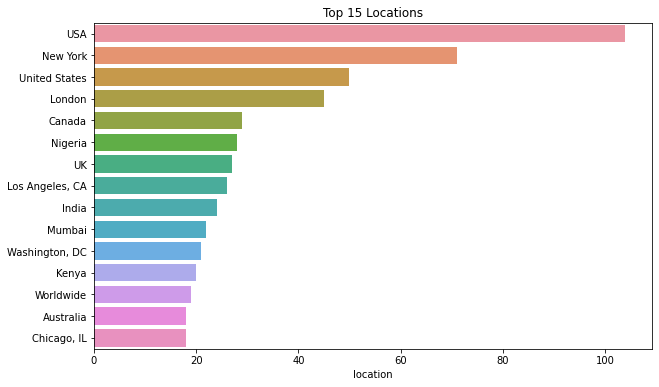

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(y=locations_with_states_and_cities[0:15].index, x=locations_with_states_and_cities[0:15] , orient='h')
plt.title("Top 15 Locations");

We will replace the name of the states and capitals with the name of the country so we can get the real numbers of locations for each country.

In [14]:
df_train.location.replace({'United States':'USA',
                           'New York':'USA',
                            "London":'UK',
                            "Los Angeles, CA":'USA',
                            "Washington, D.C.":'USA',
                            'Washington, DC':'USA',
                            "California":'USA',
                             "Chicago, IL":'USA',
                             "Chicago":'USA',
                            "New York, NY":'USA',
                            "California, USA":'USA',
                            "FLorida":'USA',
                            "Everywhere":'Worldwide',
                            'World':'Worldwide',
                            "San Francisco":'USA',
                            "Florida":'USA',
                            "United Kingdom":'UK',
                            "Los Angeles":'USA',
                            "Toronto":'Canada',
                            "San Francisco, CA":'USA',
                            "NYC":'USA',
                            "Seattle":'USA',
                            "Earth":'Worldwide',
                            "Ireland":'UK',
                            "London, England":'UK',
                            "New York City":'USA',
                            "Texas":'USA',
                            "London, UK":'UK',
                            "Atlanta, GA":'USA',
                            'Sacramento, CA':'USA',
                            'Dallas, TX':'USA',
                            'Nashville, TN':'USA',
                            'Manchester':'UK',
                            'US':'USA',
                            'San Diego':'USA',
                            'Denver, Colorado':'USA',
                            'San Diego, CA':'USA',
                            'Houston, TX':'USA',
                            'Tennesse':'USA',
                            'Seattle, WA':'USA',
                            'Denver, CO':'USA',
                            'Memphis, TN':'USA',
                            'Austin, TX':'USA',
                            'Pennsylvania, USA':'USA',
                            'Tennessee':'USA',
                            'worldwide':'Worldwide',
                            'Global':'Worldwide',
                            'Planet Earth':'Worldwide',
                            'Charlotte, NC':'USA',
                            '304':'Worldwide',
                            'Calgary, Alberta':'Canada',
                            'Brooklyn, NY':'USA',
                            'Pedophile hunting ground':'Worldwide',
                            'Portland, OR':'USA',
                            'Paterson, New Jersey':'USA',
                            'Orlando, FL':'USA',
                            'Massachusetts': 'USA',
                            'Oklahoma City, OK':'USA',
                            '??????':'Worldwide',
                            'ss':'Worldwide',
                            "California, United States":'USA',
                            'Atlanta':'USA',
                            'Colorado':'USA',
                            'Road to the Billionaires Club':'Worldwide',
                            "Paterson, New Jersey":'USA',
                            "Mumbai":"India"},inplace=True)

In [15]:
country_locations = df_train["location"].value_counts()
country_locations

USA                    628
UK                     127
Worldwide              104
Canada                  47
India                   46
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3280, dtype: int64

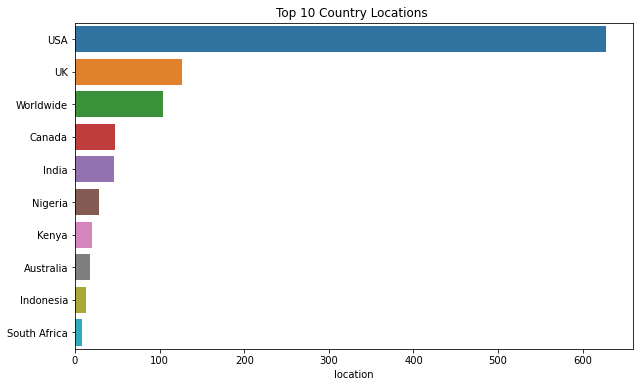

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(y=country_locations[0:10].index, x=country_locations[0:10] , orient='h')
plt.title("Top 10 Country Locations ");

We can see that the USA is at the top 

6- What are the top 15 keyword in the data?

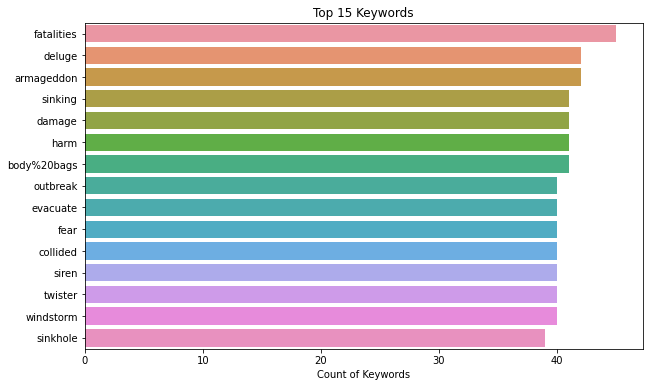

In [17]:
Keywords_filter = df_train['keyword'].value_counts()[:15]
plt.figure(figsize=(10,6))
sns.barplot( x = Keywords_filter ,y = Keywords_filter.index)
plt.title("Top 15 Keywords")
plt.xlabel("Count of Keywords");

The top keyword is fatalities

We will create a new column called length  so we can add the length of the word to the dataset

In [18]:
df_train["word_length"]  = df_train["text"].apply(len)
df_train.head()

,id,keyword,location,text,target,word_length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [19]:
df_train['word_length'].describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: word_length, dtype: float64

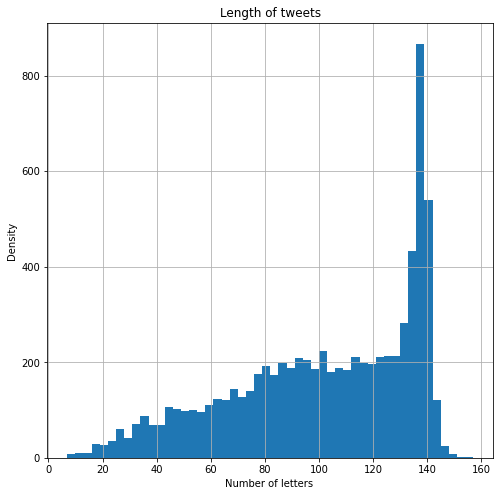

In [20]:
df_train["word_length"].hist( figsize=(8,8) , bins=50)
plt.title("Length of tweets")
plt.xlabel("Number of letters ")
plt.ylabel("Density");

In [21]:
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

The 'clean_text'function will remove all the punctuation from the text

In [22]:
df_train['clean_text'] = df_train['text'].apply(clean_text)
df_train['clean_text'].head()

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3     people receive wildfires evacuation orders in...
4    just got sent this photo from ruby alaska as s...
Name: clean_text, dtype: object

In [23]:
df_train.head()

,id,keyword,location,text,target,word_length,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,all residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,people receive wildfires evacuation orders in...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,just got sent this photo from ruby alaska as s...


In [24]:
nltk.download('stopwords')
stop_word = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


7- What are the most common stopwords?


In [25]:
def most_common_stopword(text):
    common_stopword = [w for w in text.split() if w.lower() in stopwords.words('english')]
    return common_stopword
df_train['most_common_stopwords'] = df_train['clean_text'].apply(most_common_stopword)
df_train['most_common_stopwords']

0                          [our, are, the, of, this, all]
1                                                      []
2       [all, to, in, are, being, by, no, other, or, i...
3                                                    [in]
4                   [just, this, from, as, from, into, a]
                              ...                        
7608                                            [a, into]
7609           [the, out, of, in, in, the, of, the, very]
7610                                              [s, of]
7611                             [after, an, with, a, in]
7612                                      [the, more, by]
Name: most_common_stopwords, Length: 7613, dtype: object

The function 'most_common_stopword' will remove all the words without removing the stopwords from the text

In [26]:
common_stopwords=[]
for i in df_train['most_common_stopwords']:
    for j in i:
      common_stopwords.append(j)

In [27]:
com_stopwords = pd.DataFrame (common_stopwords)
common_stopwords_filter = com_stopwords.value_counts()[:15]
common_stopwords_filter

the     3248
a       2167
in      1971
to      1943
of      1821
and     1410
i       1363
is       942
for      889
on       850
you      787
my       672
with     572
it       560
that     559
dtype: int64

As we can see the most common word is 'the' with 3248 

In [28]:
def toremove_stopword(text):
    remove_stopword = [w for w in text.split() if w.lower() not in stopwords.words('english')]
    return remove_stopword
df_train['clean_text'] = df_train['clean_text'].apply(toremove_stopword)

The function 'toremove_stopword' will remove all the stopwords  from the text

In [29]:
df_train.clean_text

0       [deeds, reason, earthquake, may, allah, forgiv...
1           [forest, fire, near, la, ronge, sask, canada]
2       [residents, asked, shelter, place, notified, o...
3       [people, receive, wildfires, evacuation, order...
4       [got, sent, photo, ruby, alaska, smoke, wildfi...
                              ...                        
7608    [two, giant, cranes, holding, bridge, collapse...
7609    [ariaahrary, thetawniest, control, wild, fires...
7610                                    [volcano, hawaii]
7611    [police, investigating, ebike, collided, car, ...
7612    [latest, homes, razed, northern, california, w...
Name: clean_text, Length: 7613, dtype: object

8- What are the most common words?


In [30]:
common_words=[]
for i in df_train['clean_text']:
    for j in i:
      common_words.append(j)

In [31]:
com_words = pd.DataFrame (common_words)
common_words_filter = com_words.value_counts()[:15]
common_words_filter

like         344
amp          298
im           294
fire         248
get          228
new          223
via          220
people       196
one          191
dont         189
news         185
us           162
video        158
emergency    156
disaster     150
dtype: int64

As we can see the most common word is like (used 344)

9- Use nlp to prepare dataset [tokenization, pad sequence, etc.] 

In [32]:
tokenizer = Tokenizer(num_words = 3000 ,split=' ')
tokenizer.fit_on_texts(df_train.clean_text.values) 
x = tokenizer.texts_to_sequences(df_train['clean_text'].values) 
X = pad_sequences(x)

10- Prepare train, test sets


In [33]:
y = df_train['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =0)
lstm = 32
model = Sequential()
model.add(Embedding(3000 , 32 , input_length = X.shape[1]))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(lstm, dropout=0.5 , recurrent_dropout=0.4)))
model.add(Dense(1,activation='sigmoid'))
adam = optimizers.Adam(learning_rate=0.002)
model.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 19, 32)            96000     
                                                                 
 dropout (Dropout)           (None, 19, 32)            0         
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 112,705
Trainable params: 112,705
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
X_test

array([[   0,    0,    0, ...,   37,  928,  278],
       [   0,    0,    0, ...,  530,  568, 1292],
       [   0,    0,    0, ...,  116,  782,  543],
       ...,
       [   0,    0,    0, ...,  471,   24,  107],
       [   0,    0,    0, ...,  948, 1080,  386],
       [   0,    0,    0, ..., 2426, 2032, 1304]], dtype=int32)

11- Train your LSTM structure


In [35]:
model_stat = model.fit(X_train, y_train, epochs = 10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
191/191 [==============================] - 16s 47ms/step - loss: 0.5640 - accuracy: 0.7000 - val_loss: 0.4428 - val_accuracy: 0.8030
Epoch 2/10
191/191 [==============================] - 8s 43ms/step - loss: 0.3914 - accuracy: 0.8323 - val_loss: 0.4377 - val_accuracy: 0.8037
Epoch 3/10
191/191 [==============================] - 8s 42ms/step - loss: 0.3526 - accuracy: 0.8565 - val_loss: 0.4632 - val_accuracy: 0.8011
Epoch 4/10
191/191 [==============================] - 8s 42ms/step - loss: 0.3257 - accuracy: 0.8657 - val_loss: 0.4661 - val_accuracy: 0.7991
Epoch 5/10
191/191 [==============================] - 8s 43ms/step - loss: 0.3139 - accuracy: 0.8739 - val_loss: 0.4777 - val_accuracy: 0.8004
Epoch 6/10
191/191 [==============================] - 8s 43ms/step - loss: 0.2997 - accuracy: 0.8810 - val_loss: 0.4877 - val_accuracy: 0.7938
Epoch 7/10
191/191 [==============================] - 8s 43ms/step - loss: 0.2868 - accuracy: 0.8851 - val_loss: 0.5212 - val_accuracy: 0.799

12- Evaluate the model and make predictions

13- Evaluate the results with charts of acc and loss

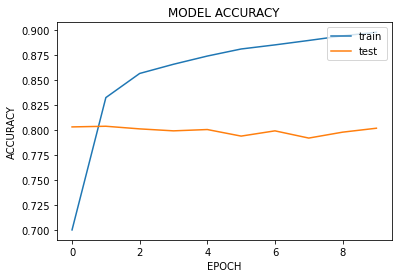

In [36]:
plt.plot(model_stat.history['accuracy'])
plt.plot(model_stat.history['val_accuracy'])
plt.title('MODEL ACCURACY')
plt.ylabel('ACCURACY')
plt.xlabel('EPOCH')
plt.legend(['train', 'test'], loc='upper right')
plt.show();

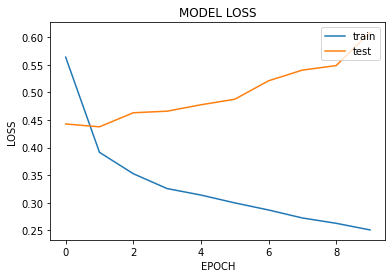

In [37]:
plt.plot(model_stat.history['loss'])
plt.plot(model_stat.history['val_loss'])
plt.title('MODEL LOSS')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['train', 'test'], loc='upper right')
plt.show();

In [38]:
y_prediction = model.predict(X_test).round()
y_prediction

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

In [39]:
train_acc = (metrics.accuracy_score(y_train,model.predict(X_train).round())*100)
train_acc

92.41379310344827

In [40]:
print('Accuracy  is  : ', (metrics.accuracy_score(y_test, y_prediction)))
print('Recall  is    : ', (metrics.recall_score(y_test, y_prediction)))
print('Precision  is : ', (metrics.precision_score(y_test, y_prediction)))

Accuracy  is  :  0.8017071569271176
Recall  is    :  0.6907378335949764
Precision  is :  0.8073394495412844


# Test Data

In [41]:
df_test = pd.read_csv('test.csv')
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [42]:
df_test['clean_text'] = df_test['text'].apply(clean_text)
df_test['clean_text'] = df_test['clean_text'].apply(toremove_stopword)
df_test.head()

,id,keyword,location,text,clean_text
0,0,NaN,NaN,Just happened a terrible car crash,"[happened, terrible, car, crash]"
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...","[heard, earthquake, different, cities, stay, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...","[forest, fire, spot, pond, geese, fleeing, acr..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,"[apocalypse, lighting, spokane, wildfires]"
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,"[typhoon, soudelor, kills, china, taiwan]"


In [43]:
tokenizer_test = Tokenizer(num_words = 3000 ,split=' ')
tokenizer_test.fit_on_texts(df_test.clean_text.values) 
tok_test = tokenizer_test.texts_to_sequences(df_test['clean_text'].values) 
X_df_test = pad_sequences(tok_test)

In [44]:
X_df_test

array([[   0,    0,    0, ...,  816,   55,   28],
       [   0,    0,    0, ...,  578,  817,  293],
       [   0,    0,    0, ...,  423, 1094,  294],
       ...,
       [   0,    0,    0, ...,  185,  565, 1299],
       [   0,    0,    0, ...,  238, 2164, 2165],
       [   0,    0,    0, ...,   14,  153, 2159]], dtype=int32)

In [45]:
X_df_test.resize(3263,19,refcheck=False)

In [46]:
X_df_test[0]


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 473, 816,  55,  28,   0], dtype=int32)

In [47]:
X_df_test.shape

(3263, 19)

In [48]:
y_prediction = model.predict(X_df_test).round()
y_prediction

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

14- Save your model

In [49]:
import joblib
joblib.dump(model, 'model.pkl')
model = joblib.load("model.pkl")

INFO:tensorflow:Assets written to: ram://1e49ec19-0d77-4b17-9940-fca8bac6e55d/assets
